In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train =pd.read_csv("../input/titanic/train.csv") 
test = pd.read_csv("../input/titanic/test.csv")
gender_submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [4]:
#check numerical values of missing data for train set
print(train.isnull().sum())
print("***********")
print(test.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
***********
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Exploratory Data Analysis

In [5]:
train_test_data = [train,test]

# Want to strip out the first letter of the cabin and try to use it to impute
for i in train_test_data:
    i['Cabin'] = i['Cabin'].str[:1]

<AxesSubplot:>

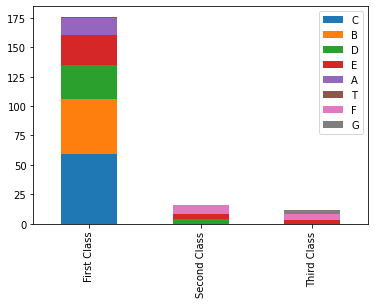

In [6]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()

#### Plot shows the number of passenger travelled in the different classes
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['First Class','Second Class', 'Third Class']
df.plot(kind='bar',stacked=True )

In [7]:
cabin_mapping = {'A':0,'B':.4,'C':.8,'D':1.2,'E':1.6,'F':2,'G':2.4,'T':2.8}
for i in train_test_data:
    i['Cabin'] = i['Cabin'].map(cabin_mapping)

In [8]:
train.groupby('Pclass')['Cabin'].transform('median')

0      2.0
1      0.8
2      2.0
3      0.8
4      2.0
      ... 
886    1.8
887    0.8
888    2.0
889    0.8
890    2.0
Name: Cabin, Length: 891, dtype: float64

In [9]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [10]:
train['Cabin'].value_counts()

2.0    492
1.8    168
0.8     99
0.4     47
1.2     33
1.6     32
0.0     15
2.4      4
2.8      1
Name: Cabin, dtype: int64

In [11]:
#create a function to apply to both datasets Age columns

def imputed_age(cols):
    Age = cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    

In [12]:
train['Age'] = train[['Age','Pclass']].apply(imputed_age, axis=1)

In [13]:
test['Age'].groupby(test['Pclass']).median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [14]:
def imputed_age_test(cols):
    Age = cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 42
        elif Pclass == 2:
            return 26
        else:
            return 24
    else:
        return Age

In [15]:
test['Age'] = test[['Age','Pclass']].apply(imputed_age, axis=1)

In [16]:
train.loc[train['Age']<=16,'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 28),'Age'] = 1
train.loc[(train['Age'] > 28) & (train['Age'] <= 36),'Age'] = 2
train.loc[(train['Age'] > 36) & (train['Age'] <= 62),'Age'] = 3
train.loc[train['Age'] > 62,'Age'] = 4

#####

test.loc[test['Age']<=16,'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 28),'Age'] = 1
test.loc[(test['Age'] > 28) & (test['Age'] <= 36),'Age'] = 2
test.loc[(test['Age'] > 36) & (test['Age'] <= 62),'Age'] = 3
test.loc[test['Age'] > 62,'Age'] = 4

In [17]:
sex_mapping = {'female':0, 'male':1}
train['Sex'] = train['Sex'].map(sex_mapping)

####

test['Sex'] = test['Sex'].map(sex_mapping)

In [18]:
train['Age'] = train['Age'].astype('int')

#####

test['Age'] = test['Age'].astype('int')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1008x576 with 0 Axes>

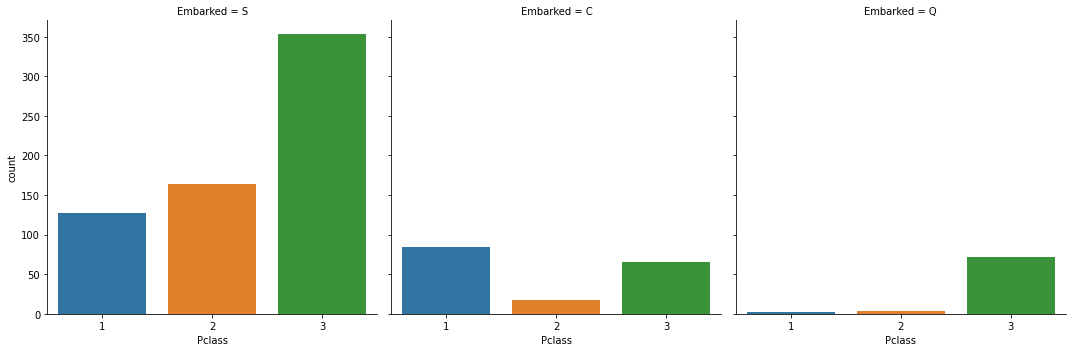

In [19]:
plt.figure(figsize=(14,8))
sns.catplot('Pclass', col='Embarked', kind='count', data=train)

In [20]:
train['Embarked'] = train['Embarked'].fillna('S')

test['Embarked'] = test['Embarked'].fillna('S')

In [21]:
train['title'] = [x.split(',')[1].split('.')[0].strip() for x in train['Name']]
print(train['title'].unique())

test['title'] = [x.split(',')[1].split('.')[0].strip() for x in test['Name']]
print(test['title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [22]:
#Only want 5 categories so we will throw some of the odd ones into Other
train['title'] = train['title'].replace(['Col','Rev','Dr','Don','Major','Lady','Sir','Capt','the Countess','Jonkheer'], 'Other')

train['title'] = train['title'].replace(['Mme','Ms','Mlle'],'Miss')

#######

test['title'] = test['title'].replace(['Col','Rev','Dr','Dona'],'Other')

test['title'] = test['title'].replace('Ms','Miss')

In [23]:
train = train.drop('Name', axis=1)

#####

test = test.drop('Name', axis=1)

In [24]:
#Need to encode these titles to work with
title_mapping = {'Mr':0,'Mrs':1,'Miss':2,'Master':3,'Other':4}

train['title'] = train['title'].map(title_mapping)

#######

test['title'] = test['title'].map(title_mapping)

In [25]:
train = train.drop('Ticket', axis=1)

######

test = test.drop('Ticket', axis=1)

<Figure size 1008x576 with 0 Axes>

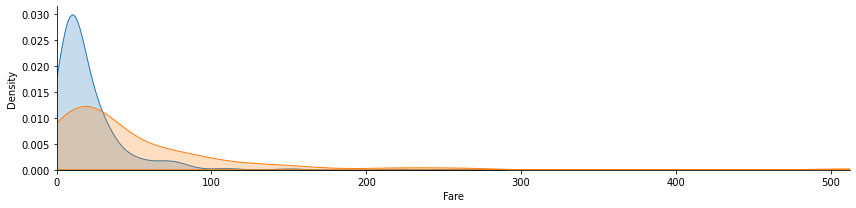

In [26]:
plt.figure(figsize=(14,8))
facet = sns.FacetGrid(train, hue='Survived', aspect =4)
facet.set(xlim=(0,train['Fare'].max()))
facet.map(sns.kdeplot, 'Fare', shade = True)

<Figure size 1008x576 with 0 Axes>

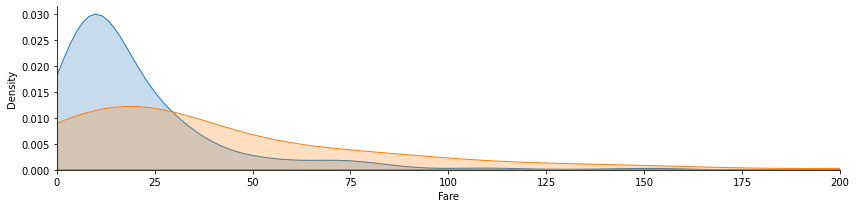

In [27]:
plt.figure(figsize=(14,8))
facet = sns.FacetGrid(train, hue='Survived', aspect =4)
facet.set(xlim=(0,200))
facet.map(sns.kdeplot, 'Fare', shade = True)

In [28]:
train.loc[train['Fare']<=20,'Fare'] = 0
train.loc[(train['Fare'] > 20) & (train['Fare'] <= 70),'Fare'] = 1
train.loc[(train['Fare'] > 70) & (train['Fare'] <= 175),'Fare'] = 2
train.loc[train['Fare'] > 175,'Fare'] = 3

########

test.loc[test['Fare']<=20,'Fare'] = 0
test.loc[(test['Fare'] > 20) & (test['Fare'] <= 70),'Fare'] = 1
test.loc[(test['Fare'] > 70) & (test['Fare'] <= 175),'Fare'] = 2
test.loc[test['Fare'] > 175,'Fare'] = 3

In [29]:
#Need to encode the embarked column
embarked_mapping = {'S':0,'C':1,'Q':2}

train['Embarked'] = train['Embarked'].map(embarked_mapping)

test['Embarked'] = test['Embarked'].map(embarked_mapping)

In [30]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

test['Family_size'] = test['SibSp'] + test['Parch'] + 1

In [31]:
family_mapping = {1:0,2:.4,3:.8,4:1.2,5:1.6,6:2,7:2.4,8:2.8,9:3.2,10:3.6,11:4}

#Need to encode the family_size columns
train['Family_size'] = train['Family_size'].map(family_mapping)

test['Family_size'] = test['Family_size'].map(family_mapping)

In [32]:
train = train.drop(['SibSp','Parch'], axis=1)

test = test.drop(['SibSp','Parch'], axis=1)

In [33]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,title,Family_size
0,1,0,3,1,1,0.0,2.0,0,0,0.4
1,2,1,1,0,3,2.0,0.8,1,1,0.4
2,3,1,3,0,1,0.0,2.0,0,2,0.0
3,4,1,1,0,2,1.0,0.8,0,1,0.4
4,5,0,3,1,2,0.0,2.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,1,0.0,1.8,0,4,0.0
887,888,1,1,0,1,1.0,0.4,0,2,0.0
888,889,0,3,0,1,1.0,2.0,0,2,1.2
889,890,1,1,1,1,1.0,0.8,1,0,0.0
